# Relation entre les symptomes d"anxieté et l'image de soi chez les enfants du primaire.

Cette étude vise à explorer la relation entre les symptômes d'anxiété et l'image de soi chez les enfants du primaire, ainsi que le rôle médiateur des conflits dans la relation enseignant-élève. En utilisant des données issues d'une vaste étude universitaire sur le développement psychosocial des enfants, nous avons examiné si un niveau élevé d'anxiété est associé à une image de soi plus négative et comment les conflits dans la relation enseignant-élève peuvent influencer cette relation.

#### ****Questions de recherche****

1. Le niveau de symptômes d’anxiété dans le groupe 6 est-il en corrélation avec le niveau d’estime de soi la même année ?
2. Dans quelle mesure l’association entre les symptômes d’anxiété en 6e année et l’estime de soi la même année est-elle médiée par les conflits dans la relation enseignant-élève rapportés par l’enseignant ?

#### ****Hypothèses****
- Il existe une relation négative entre le prédicteur « niveau de symptômes d'anxiété » et la variable dépendante « image de soi globale » dans le groupe 6.
- Pour les élèves ayant plus de conflits dans la relation enseignant-élève, le niveau de symptômes d'anxiété du groupe 6 sera associé à une image globale de soi plus négative dans le groupe 6 que pour les élèves ayant moins de conflits dans la relation enseignant-élève.

## Méthodologie de recherches

### Choix des variables et sources des données

Le but de notre analyse de données consiste à examiner le lien qui existe  entre les symptômes d’anxiété et l’image de soi chez les enfants de primaire et à  aussi explorer le rôle médiateur des conflits dans la relation enseignant-élève dans cette relation. Un tel succès à notre analyse requiert des variables et des données se ralliant très bien à notre étude de recherche.  Ainsi, notre variable de réponse ou encore notre variable cible  est ***l’image de soi globale***. Avec cette variable, nous ferons des analyses de données qui nous fourniront des insights précieux pour répondre à notre étude de recherche. Notre base de données mesure cette variable cible par (échelle « image de soi générale » du questionnaire CBSK : SC4.6, SC8.6, SC12.6, SC16.6, SC20.6R, SC24.6).

Seule la variable cible de notre jeu de données ne permet pas de réaliser une étude profonde avec des résultats pertinents. À ces mots, nos variables d’étude comprennent également des variables nommées variables indépendantes ou encore variables prédictrices. Dans notre contexte d’analyse, il s’agit bien des variables comme : ***Du niveau de symptômes d'anxiété*** (échelle GAD du questionnaire RCADS : RC1.6, RC5.6, RC9.6, RC11.6, RC13.6) et ***des conflits dans la relation enseignant-élève*** (questionnaire LLRV : LL1.6, LL2.6, LL3.6, LL4.6, LL5.6).

Le choix de nos variables, la nature de notre jeu de données et les objectifs de notre étude nous permettent de réaliser une étude quantitative afin de fournir des conclusions significatives. **Les données pour cette analyse sont collectées durant une étude universitaire plus vaste qui examine le développement psychosocial des enfants à l'école primaire.**

### Descriptions de la modélisation statistique
L’objet dont faite question  notre recherche nous impose certaines modélisations statistiques comme des tests d’hypothèses et des régressions linaires. D’abord, une ***analyse de corrélation précisément les corrélations de Pearson ou Sperman*** dans le but de  test le score  de symptôme d’anxiété et le score d’image de soi globale pour le groupe 6.

Ensuite, une ***régression linéaire*** très importante pour examiner la relation entre le niveau de symptômes d'anxiété (VI) et l'image de soi globale (VD). Nous continuerons toujours avec une régression pour l’évaluation du rôle des conflits dans la relation enseignant-élève (VM).
Une analyse qui inclura : 
- Symptômes d'anxiété (VI) → Image de soi globale (VD)
- Symptômes d'anxiété (VI) → Conflits relation enseignant-élève (VM)
- Symptômes d'anxiété (VI) et Conflits relation enseignant-élève (VM) → Image de soi globale (VD)



## Importation des librairies d'analyse

In [2]:
# importation des librairies
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

## Importation de jeu de données brut

In [3]:
spss=pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\20220609 - (GROUP)-1.xlsx')
spss.columns

Index(['ALIAS_ID', 'COH', 'MALE', 'AGE_p.6', 'AGE_p.7', 'RC_c001.6',
       'RC_c001.7', 'RC_c005.6', 'RC_c005.7', 'RC_c009.6',
       ...
       'LL_t002.6', 'LL_t002.7', 'LL_t003.6', 'LL_t003.7', 'LL_t004.6',
       'LL_t004.7', 'LL_t005.6', 'LL_t005.7', 'LL_tCONm.6', 'LL_tCONm.7'],
      dtype='object', length=111)

Notre jeu de données reçue présente des variables qui sont inutiles, plus encores des variables qui nécessitent de faire des sommes afin de créer de nouvelles:

#### Création du prédicteur la variable ***le score total pour les symptômes d'anxieté***

In [4]:
spss['scoreTotalAnxiety'] = spss[["RC_c001.6", "RC_c005.6", "RC_c009.6", "RC_c011.6", "RC_c013.6", "RC_c014.6"
]].sum(axis=1)

#### Création de la variable cible ***le score total pour l'image de soi***

Filtrage des colonnes démarrant par la lettre "S" et suppression des colonnes commençant par le chiffre 7


In [10]:

# Filtrer les colonnes qui commencent par la lettre 'S'
s_columns = [col for col in spss.columns if col.startswith('S')]

# Supprimer les colonnes qui se terminent par le chiffre 7
filtered_columns = [col for col in s_columns if not col.endswith('.7')]

# Calculer le score total pour l'image de soi
spss['scoreTotalImageSoi'] = spss[['SC_c004.6', 'SC_c008.6','SC_c012.6','SC_c016.6','SC_c020.6']].sum(axis=1)


#### Création du prédicteur la variable ***le score total pour les conflits dans la relation enseignant-élève***

In [13]:
# Filtrer les colonnes qui commencent par la lettre 'S'
s_columns = [col for col in spss.columns if col.startswith('L')]

# Supprimer les colonnes qui se terminent par le chiffre 7
filtered_columns = [col for col in s_columns if not col.endswith('.7')]

# Calculer le score total pour les conflits dans la relation enseignant-élève
spss['scoreTotalConflit'] = spss[['LL_t001.6', 'LL_t002.6', 'LL_t003.6', 'LL_t004.6', 'LL_t005.6']].sum(axis=1)

Après le feature engineering, nous créererons un nouveau dataframe.Dataframe qui sera notre nouvelle base de données pour la suite de notre analyse. 

***Nouvelle base de données pour notre analyse***

In [48]:

datasoi =spss[['MALE', 'AGE_p.6','scoreTotalConflit','scoreTotalImageSoi','scoreTotalAnxiety']]
datasoi #affichage de la base de données

,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
0,1,10.380,3,12,-994
1,0,10.250,0,12,-993
2,1,9.255,0,12,-998
3,0,-999.000,-4995,-4995,-5994
4,0,10.460,0,9,-991
...,...,...,...,...,...
783,1,-999.000,-4995,-4995,-5994
784,1,9.750,0,12,-998
785,1,10.110,0,12,-997
786,0,9.820,0,12,-994


## Analyse exploratoire des données

### Préparation des données

Avant toutes analyses, le traitement de la base de données reste une étape très cruciale pour assurer la fiabilité des résultats. Triste est de constater que notre jeu de données présentait des erreurs à corriger. Vu la complexité du jeu de données, nous commencerons par une manipulation et pré-traitement minutieux. 

In [49]:
# vérification des doublons, des valeurs abérrantes et manquantes

# doublons
doublons=datasoi[datasoi.duplicated()]
print("les doublons sont : ")
doublons


les doublons sont : 


,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
11,0,-999.00,-4995,-4995,-5994
31,1,-999.00,-4995,-4995,-5994
35,0,-999.00,-4995,-4995,-5994
45,0,-999.00,-4995,-4995,-5994
59,1,-999.00,-4995,-4995,-5994
...,...,...,...,...,...
763,0,9.81,0,12,-994
764,0,9.69,0,12,-995
768,0,10.10,0,12,-998
783,1,-999.00,-4995,-4995,-5994


In [50]:
# suppression des doublons
datasoi=datasoi.drop_duplicates()

In [51]:
# détection des outliers avec la méthode iqr
Q1 = datasoi.quantile(0.25)
Q3 = datasoi.quantile(0.75)
IQR = Q3-Q1
outliers=((datasoi<(Q1-1.5*IQR))|(datasoi >(Q3+1.5*IQR)))
valeurs_aberrantes=datasoi[outliers.any(axis=1)]

# affichage des résultats
print("les valeurs aberrantes sont : ")
valeurs_aberrantes

les valeurs aberrantes sont : 


,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
3,0,-999.00,-4995,-4995,-5994
4,0,10.46,0,9,-991
6,1,10.23,4,7,-988
9,1,11.24,3,12,-994
19,0,9.70,12,11,-994
...,...,...,...,...,...
775,1,9.91,10,12,-994
776,1,9.99,9,12,-994
777,1,10.35,0,9,-999
781,1,9.94,13,12,-999


In [52]:
# suppression des lignes contenant des outliers
print('Nouvelle base de données sans les outliers :')
datasoi=datasoi.drop(valeurs_aberrantes.index)
datasoi

Nouvelle base de données sans les outliers :


,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
0,1,10.380,3,12,-994
1,0,10.250,0,12,-993
2,1,9.255,0,12,-998
5,1,9.290,2,13,-992
7,0,10.020,0,12,-998
...,...,...,...,...,...
779,1,10.210,0,12,-998
780,1,9.790,7,12,-997
782,0,10.490,0,12,-998
784,1,9.750,0,12,-998


<Axes: >

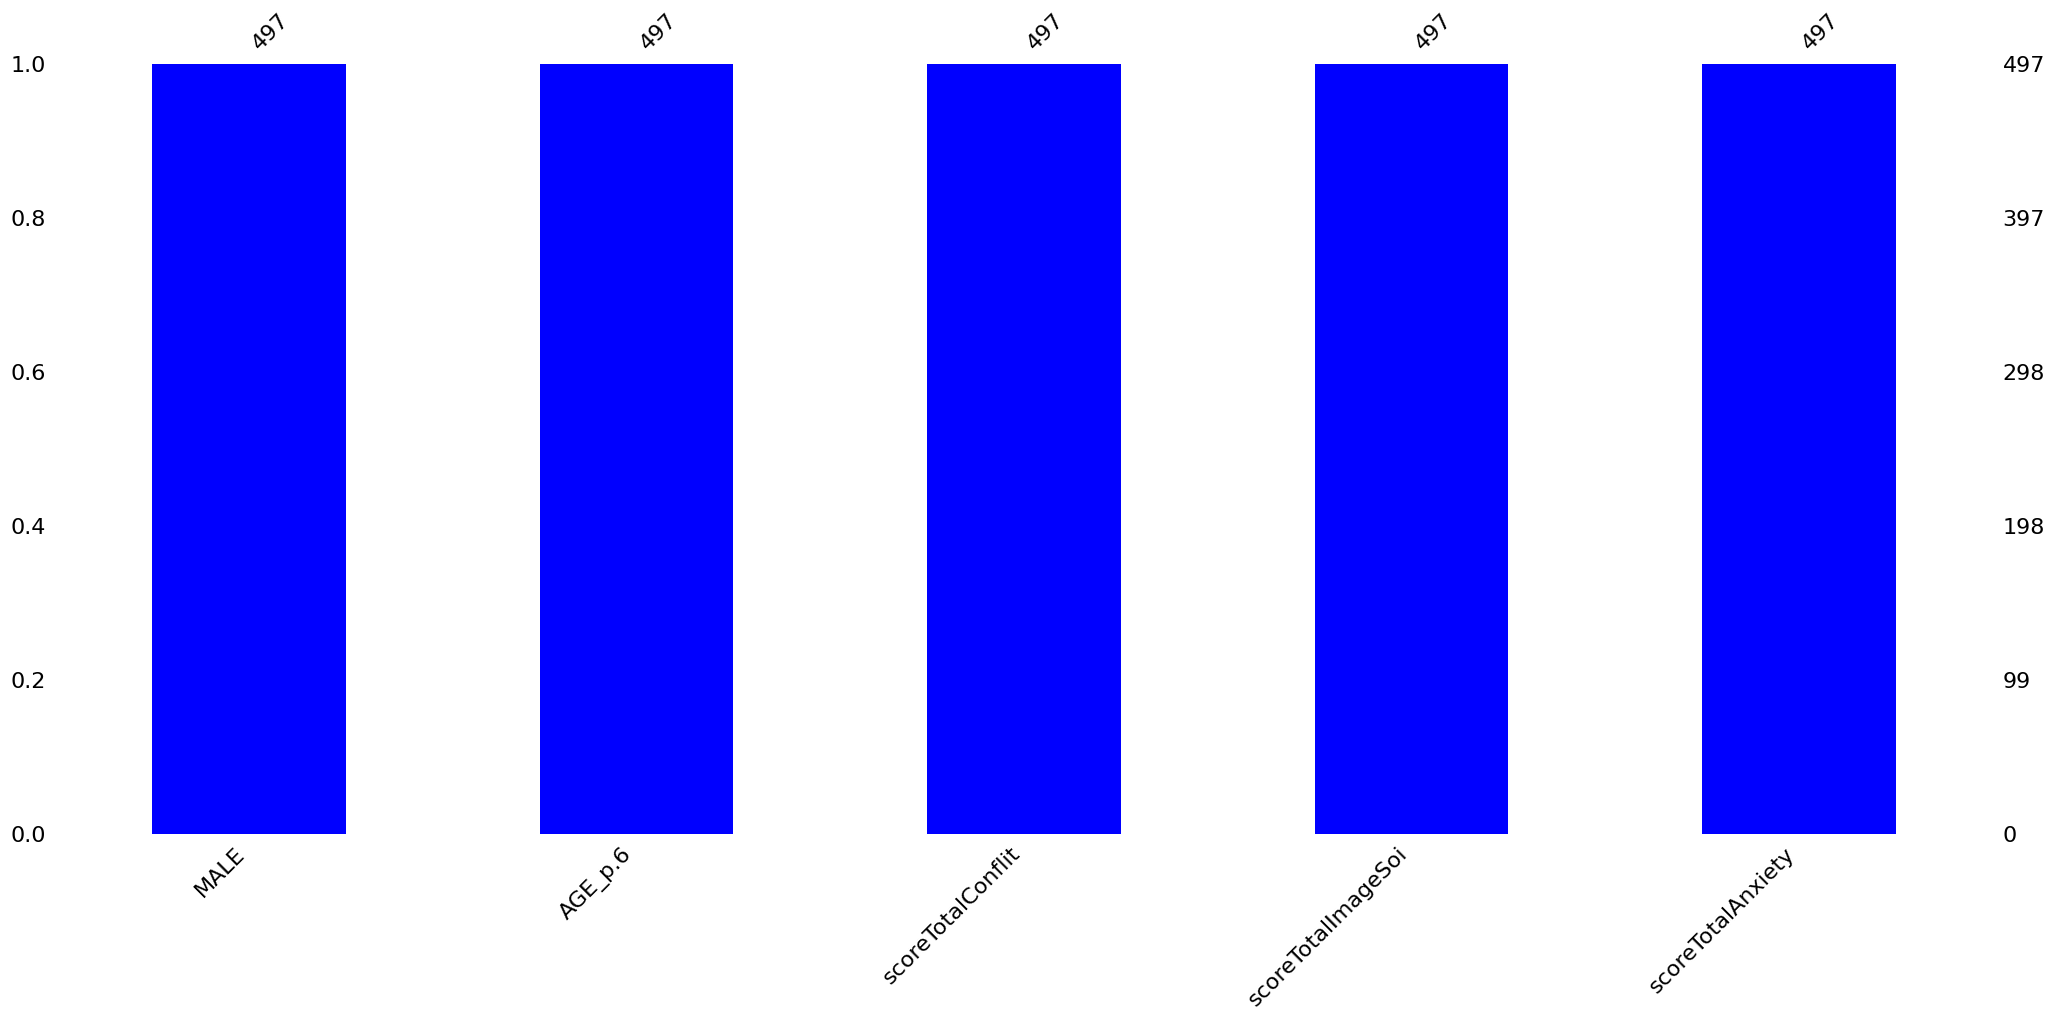

In [55]:
msno.bar(datasoi, color='blue')

Tout d’abord, nous commenceront par traiter les valeurs manquantes, les doublons et les valeurs aberrantes. Le résultat de notre analyse ci-dessous montre que notre base de données ne comporte aucune valeur manquante qui pourrait compromettre la fiabilité de notre  analyse. Ce qui jusque là se révèle très bon pour les résultats à venir. Mais, en ce qui concerne ***les doublons, plus précisément les valeurs répétées, nous en avons trouvé 62  dans le jeu de données***.

Par ailleurs, le nettoyage du jeu de données ne s’est pas arrêté là, car il contenait également ***près de 229  valeurs aberrantes.*** Laissez de telles valeurs aberrantes risquent de compromettre de notre analyse de données. 

In [53]:
datasoi['MALE'].value_counts()

MALE
0    262
1    235
Name: count, dtype: int64

Après suppression des valeurs aberrantes et de certaines variables, notre jeu de données contient finalement 539 observations soit la variable « MALE » qui caractérise le « sexe » des enfants  avec ***262 filles et 235 garçons.*** Ces résultats sont plus ou moins acceptables afin de réaliser notre étude de recherche.

### Normalisation  de la base de données

In [56]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler =MinMaxScaler()
datasoinorma=datasoi.copy()
datasoinorma[datasoi.columns]=minmaxscaler.fit_transform(datasoi[datasoi.columns])
datasoinorma

,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
0,1.0,0.630631,0.428571,0.666667,0.454545
1,0.0,0.572072,0.000000,0.666667,0.545455
2,1.0,0.123874,0.000000,0.666667,0.090909
5,1.0,0.139640,0.285714,1.000000,0.636364
7,0.0,0.468468,0.000000,0.666667,0.090909
...,...,...,...,...,...
779,1.0,0.554054,0.000000,0.666667,0.090909
780,1.0,0.364865,1.000000,0.666667,0.181818
782,0.0,0.680180,0.000000,0.666667,0.090909
784,1.0,0.346847,0.000000,0.666667,0.090909


### Statistique descriptive

Toujours sur le logiciel Python, nous avons procédé à la dernière étape du nettoyage des données. En effet, elle consiste à normaliser nos données, grâce aux notions d’apprentissage automatique (Machine Learning), dans le but de rendre nos valeurs en intervalle de 0 à1.
Ainsi donc, nous avons pu démarrer notre analyse de données par la statistique descriptive 

In [57]:
# statistique descriptive
statistic= datasoinorma.describe()
statistic

,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
count,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.472837,0.457330,0.162690,0.590879,0.299616
std,0.499765,0.191995,0.291094,0.230565,0.230459
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.310811,0.000000,0.666667,0.090909
50%,0.000000,0.454955,0.000000,0.666667,0.272727
75%,1.000000,0.576577,0.142857,0.666667,0.454545
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualisation des données

### Matrice de corrélaion

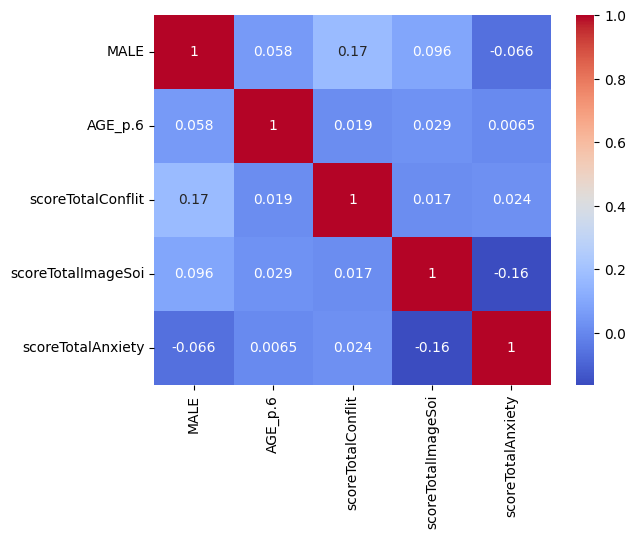

In [58]:
# matrice de corrélations
correation =datasoinorma.corr()
sns.heatmap(correation, annot=True, cmap='coolwarm')
plt.show()

La visualisation ci-dessus est la matrice de corrélation qui essaie de montrer déjà la relation existante entre la variable cible et les prédicteurs. Nous remarquons, le score total d’anxieté  (scoreTotalanxiety) présente une corrélation négative (-0,16) par rapport aux autres prédicteurs comme le score total des conflits dans la relation enseignant-élève? l'âge et le sexe qui montrent chacune une très légère corrélation positive (0,017) (0,029) et (0,096). 

Nous pouvons donc conclure que le score total d’anxiété est plus prédictif que le  sexe. Alors que que le sexe est plus prédictif que l'âge. L'âge qui de son tour est plus prédictif que le score total de conflit dans la relation enseignant-élève.La visualisation suivante confirmera cette conclusion par une zone pâle dans les graphiques. Plus petite est la zone pâle, meilleure sera la prédiction des prédicteurs.

### Relation la variable de cible et les prédicteurs

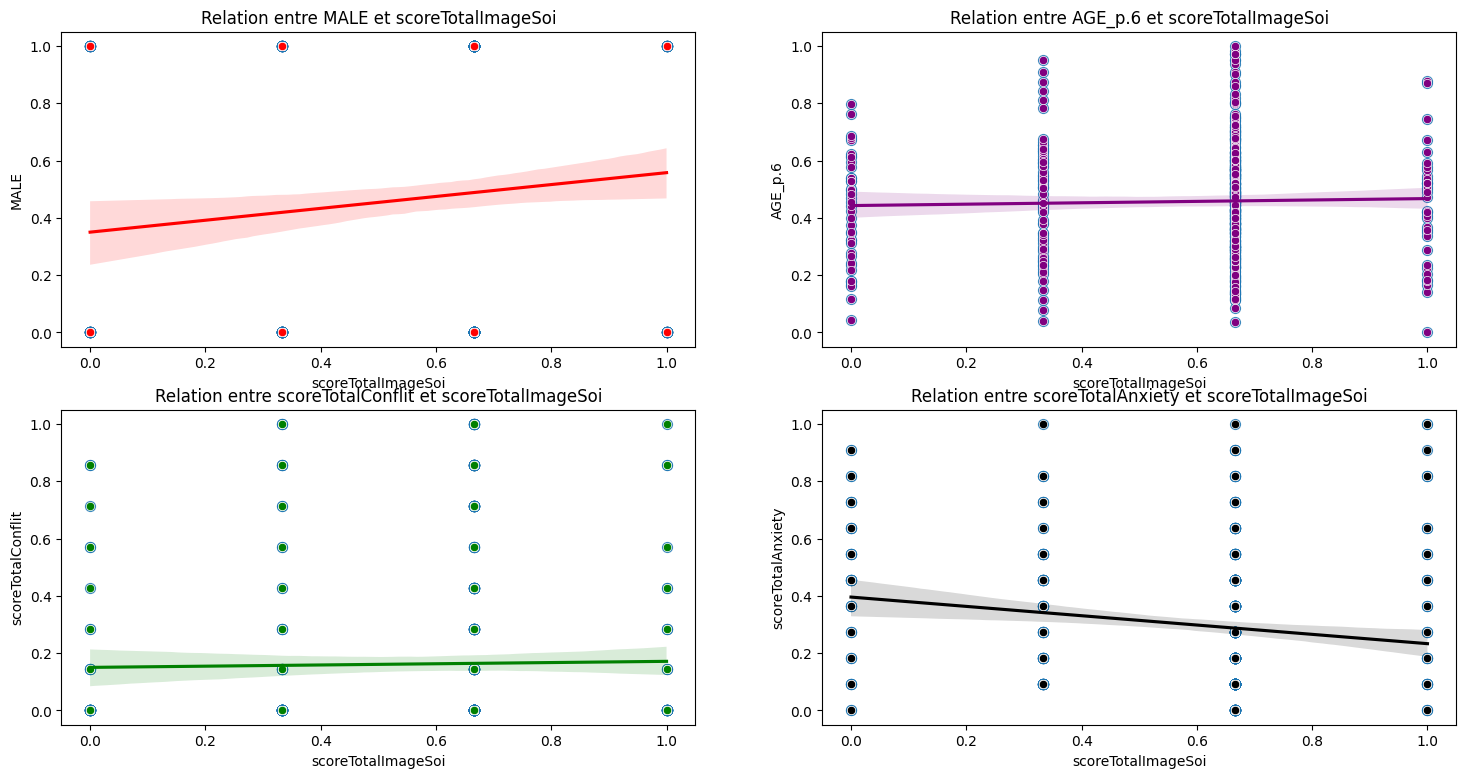

In [62]:
# Rélation entre la variabe cible et les préditeurs
variables = ['MALE', 'AGE_p.6', 'scoreTotalConflit','scoreTotalAnxiety']
fig, ax = plt.subplots(2,2, figsize=(18, 9))
# Couleurs pour chaque variable
colors = ['red', 'purple', 'green', 'black', 'orange']

# Tracé des graphiques
for ax, var, color in zip(ax.flat, variables, colors):
    sns.regplot(x='scoreTotalImageSoi', y=var, data=datasoinorma, scatter_kws={'s': 50}, line_kws={'color': color}, ax=ax)
    ax.set_title(f'Relation entre {var} et scoreTotalImageSoi')
    sns.scatterplot(x='scoreTotalImageSoi', y=var, data=datasoinorma, color=color, ax=ax)

## Analyse avancées

### Analyse des corrélations


In [69]:
# Assurez-vous que 'datasoinorma' est un DataFrame
datasoinorma = pd.DataFrame(datasoinorma)

# Calcul de la matrice de corrélation en utilisant la méthode de Pearson
corr_matrix = datasoinorma.corr(method='pearson')

# Affichage de la matrice de corrélation
corr_matrix


,MALE,AGE_p.6,scoreTotalConflit,scoreTotalImageSoi,scoreTotalAnxiety
MALE,1.000000,0.057746,0.172983,0.095828,-0.066052
AGE_p.6,0.057746,1.000000,0.018702,0.029308,0.006484
scoreTotalConflit,0.172983,0.018702,1.000000,0.016719,0.024039
scoreTotalImageSoi,0.095828,0.029308,0.016719,1.000000,-0.162784
scoreTotalAnxiety,-0.066052,0.006484,0.024039,-0.162784,1.000000


#### Interprétation des résultats de Corrélation

Les résultats de la matrice de corrélation montrent les coefficients de corrélation de Pearson entre la variable dépendante `scoreTotalImageSoi` et les autres variables prédicteurs. Voici les coefficients pertinents :

- **MALE et scoreTotalImageSoi** : 0.095828
- **AGE_p.6 et scoreTotalImageSoi** : 0.029308
- **scoreTotalConflit et scoreTotalImageSoi** : 0.016719
- **scoreTotalAnxiety et scoreTotalImageSoi** : -0.162784

La corrélation entre `scoreTotalAnxiety` (niveau de symptômes d'anxiété) et `scoreTotalImageSoi` (image de soi globale) est de -0.162784. Ce coefficient de corrélation est négatif, ce qui indique qu'il y a une relation inverse entre les symptômes d'anxiété et l'image de soi. En d'autres termes, à mesure que les symptômes d'anxiété augmentent, l'image de soi tend à diminuer.

#### Ce qu'on retient

Les résultats de la corrélation indiquent qu'il existe une relation négative significative entre les symptômes d'anxiété et l'image de soi chez les enfants du groupe 6. Cela valide l'hypothèse H1 et souligne l'importance de gérer les niveaux d'anxiété pour améliorer l'image de soi des enfants. Des interventions appropriées devraient être mises en place pour aborder ces problèmes et aider les enfants à développer une image de soi positive malgré les défis liés à l'anxiété.

### Regression linéaire multiple

In [71]:
# modélisation économétrique
# analyse de corrélation  de pearson
x= datasoinorma[['MALE', 'AGE_p.6', 'scoreTotalConflit','scoreTotalAnxiety']] # les prédicteurs

y=datasoinorma['scoreTotalImageSoi'] #la vaiable s

# Division  des données en sous ensemble d'entraînement et de test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=808)

x_train_const =sm.add_constant(x_train)
model =sm.OLS(y_train,x_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     scoreTotalImageSoi   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.560
Date:                Wed, 17 Jul 2024   Prob (F-statistic):            0.00723
Time:                        13:29:09   Log-Likelihood:                 26.611
No. Observations:                 397   AIC:                            -43.22
Df Residuals:                     392   BIC:                            -23.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6090      0.03

### Interprétation des résultats de la régression Linéaire

Les résultats de la régression linéaire montrent l'effet des variables indépendantes `MALE`, `AGE_p.6`, `scoreTotalConflit`, et `scoreTotalAnxiety` sur la variable dépendante `scoreTotalImageSoi`.

#### Statistiques globales du modèle

- **R-squared** : 0.035
- **Adjusted R-squared** : 0.025
- **F-statistic** : 3.560 (p-value = 0.00723)

Ces valeurs indiquent que le modèle explique environ 3.5% de la variance de `scoreTotalImageSoi`, ce qui est relativement faible. Cependant, la statistique F montre que le modèle est globalement significatif.

#### Coefficients des variables

- **MALE** : 0.0422 (p = 0.072) - Bien que ce coefficient soit positif, il n'est pas significatif au niveau de 0.05, ce qui signifie que le genre masculin n'a pas d'impact significatif sur l'image de soi globale.
- **AGE_p.6** : -0.0012 (p = 0.983) - L'âge des élèves n'a pas d'impact significatif sur l'image de soi globale.
- **scoreTotalConflit** : 0.0429 (p = 0.294) - Le score total des conflits n'est pas un prédicteur significatif de l'image de soi globale.
- **scoreTotalAnxiety** : -0.1466 (p = 0.003) - Ce coefficient est négatif et significatif, indiquant qu'une augmentation des symptômes d'anxiété est associée à une diminution de l'image de soi globale.


## Analyse des résidus

### Test d'homoscédasticité

In [72]:
# Analyse des résidus
residuals = model.resid

# Test d'homoscédasticité
lm_statistic, lm_p_value,f_statistic, f_p_value=het_breuschpagan(residuals, x_train_const)

# Affichage des résultats
print('LM Statistic :',lm_statistic)
print('LM pvalue :',lm_p_value)
print('F-statistic :', f_statistic)
print('F pvalue ;',f_p_value)

LM Statistic : 30.677957267020656
LM pvalue : 3.5611570453697187e-06
F-statistic : 8.207095018738716
F pvalue ; 2.302917030018601e-06


### Test d'autocorrélation des résidus

In [73]:

# Test d'autocorrélation des résidus
statistic_durbin=durbin_watson(residuals)

# Affichage des résultats
print('Durbin-Watson statistic :',statistic_durbin)


Durbin-Watson statistic : 2.1089640306026665


### Test de normalité des résidus

In [74]:

# Test de normalité des résidus
statistic_shapiro, p_value_shapiro=shapiro(residuals)

# Affichages des résultats
print('Shapiro-Wilk statistic :',statistic_shapiro)
print('Shapiro-Wilk pvalue :',p_value_shapiro)

Shapiro-Wilk statistic : 0.8387121558189392
Shapiro-Wilk pvalue : 1.0609237590846137e-19


### Interprétation des analyses des résidus

#### Statistiques du Modèle

- **LM Statistic** : 30.68 (p-value = 3.56e-06) - Cette statistique de Lagrange multiplier indique une forte présence d'autocorrélation dans les erreurs, ce qui suggère que le modèle peut être mal spécifié.
- **F-statistic** : 8.21 (p-value = 2.30e-06) - L'analyse de la variance (ANOVA) montre que le modèle est globalement significatif, confirmant qu'au moins une des variables prédictives a une relation significative avec la variable dépendante.
- **Durbin-Watson statistic** : 2.11 - Cette statistique indique une faible présence d'autocorrélation dans les erreurs résiduelles, ce qui est souhaitable pour la validité du modèle.

#### Normalité des Résidus
- **Shapiro-Wilk statistic** : 0.839 (p-value = 1.06e-19) - La statistique de Shapiro-Wilk indique que les résidus ne suivent pas une distribution normale, ce qui peut affecter la validité des tests statistiques et la précision des intervalles de confiance.

### Confirmation des Hypothèses
- **H1 : Relation négative entre l'anxiété et l'image de soi** : Confirmée. Le coefficient de `scoreTotalAnxiety` est négatif (-0.1466) et significatif (p = 0.003), suggérant qu'un niveau plus élevé d'anxiété est associé à une image de soi plus négative chez les enfants.
- **H2 : Rôle médiateur des conflits** : Non confirmé. Le coefficient de `scoreTotalConflit` est non significatif (p = 0.294), indiquant que les conflits dans la relation enseignant-élève ne jouent pas un rôle médiateur significatif entre l'anxiété et l'image de soi.

### Discussion
Les résultats montrent que les symptômes d'anxiété sont un prédicteur significatif de l'image de soi chez les enfants du primaire, tandis que les conflits dans la relation enseignant-élève, l'âge et le sexe ne montrent pas d'effets significatifs. Ces résultats suggèrent que les interventions visant à réduire les symptômes d'anxiété peuvent améliorer l'image de soi des enfants. 

Cependant, l'autocorrélation détectée dans les erreurs et la non-normalité des résidus suggèrent que le modèle pourrait être amélioré. Des modèles alternatifs ou des ajustements supplémentaires pourraient être nécessaires pour renforcer la robustesse des conclusions.

### Conclusion
Les symptômes d'anxiété jouent un rôle significatif dans l'image de soi des enfants du primaire, tandis que les conflits dans la relation enseignant-élève, l'âge et le sexe n'ont pas d'effet significatif. Des interventions pour gérer l'anxiété pourraient donc avoir un impact positif notable sur l'image de soi des enfants. Toutefois, la présence d'autocorrélation et la non-normalité des résidus indiquent que des analyses supplémentaires pourraient être nécessaires pour affiner ces conclusions.